<a href="https://colab.research.google.com/github/emad550/AI_DS/blob/main/Emad_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to import some libraries 

In [5]:
#Please open Use Google Colab
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

We need to extract data 

In [6]:
from google.colab import drive
drive.mount("/content/drive")
data=pd.read_excel("/content/drive/My Drive/50ulke.xlsx")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Countries,National Income,Growth,Per person,Continent
0,0,United States,20412.87,2.27,62152,North America
1,1,China,14092.51,6.86,10088,Asia
2,2,Japan,5167.05,1.71,40849,Asia
3,3,Germany,4211.64,2.51,50842,Europe
4,4,United Kingdom,2936.29,1.79,44177,Europe


Then start exploratory data analysis

In [7]:
data.info()
#no null value 
data.groupby('Continent').sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   Countries        50 non-null     object 
 2   National Income  50 non-null     float64
 3   Growth           50 non-null     float64
 4   Per person       50 non-null     int64  
 5   Continent        50 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


,Unnamed: 0,National Income,Growth,Per person
Continent,,,,
Africa,107,1032.75,6.37,11178
Asia,482,31098.54,83.84,353755
Europe,441,21656.99,56.64,786736
North America,23,23424.21,7.31,120341
Oceania,13,1500.26,2.27,59655
South America,159,3604.66,9.59,53135


In [8]:
data.describe()
#Gab between min and max income very high

,Unnamed: 0,National Income,Growth,Per person
count,50.00000,50.000000,50.000000,50.000000
mean,24.50000,1646.348200,3.320400,27696.000000
std,14.57738,3448.554429,2.053468,25094.131496
min,0.00000,231.570000,-0.740000,1615.000000
25%,12.25000,353.440000,1.795000,6402.000000
50%,24.50000,522.985000,2.880000,14565.500000
75%,36.75000,1504.895000,4.287500,48738.250000
max,49.00000,20412.870000,7.810000,86835.000000


In [9]:
# we discover minus value inside Growth 
data['Growth']=data['Growth'].abs()
data

,Unnamed: 0,Countries,National Income,Growth,Per person,Continent
0,0,United States,20412.87,2.27,62152,North America
1,1,China,14092.51,6.86,10088,Asia
2,2,Japan,5167.05,1.71,40849,Asia
3,3,Germany,4211.64,2.51,50842,Europe
4,4,United Kingdom,2936.29,1.79,44177,Europe
5,5,France,2925.10,1.85,44934,Europe
6,6,India,2848.23,6.74,2135,Asia
7,7,Italy,2181.97,1.47,35914,Europe
8,8,Brazil,2138.92,0.98,10224,South America
9,9,Canada,1798.51,3.00,48466,North America


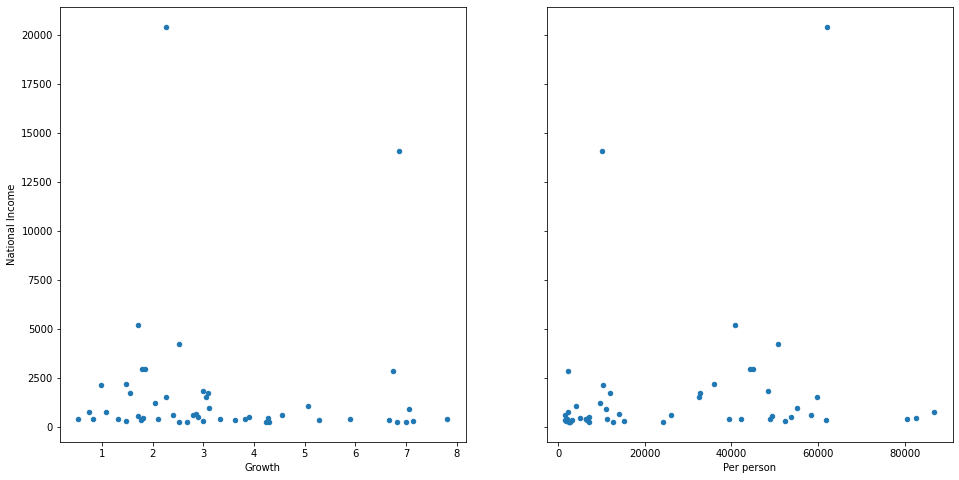

In [10]:
fig,ax=plt.subplots(1,2,sharey=True)
data.plot(kind='scatter',x='Growth',y='National Income',ax=ax[0],figsize=(16,8))
data.plot(kind='scatter',x='Per person',y='National Income',ax=ax[1])
#Let us discover more relation

In [11]:
def bar(x,y):
  fig=plt.figure(figsize=(16,12))
  fig=px.bar(x=data[x],y=data[y],color=data[x])
  fig.show()

In [12]:
bar('Countries','National Income')

<Figure size 1152x864 with 0 Axes>

In [13]:
bar('Continent','National Income')

<Figure size 1152x864 with 0 Axes>

In [14]:
px.box(data['Growth'],data['Continent'],color=data['Continent'],points='outliers')

let us discover more relation between National Income and Per person

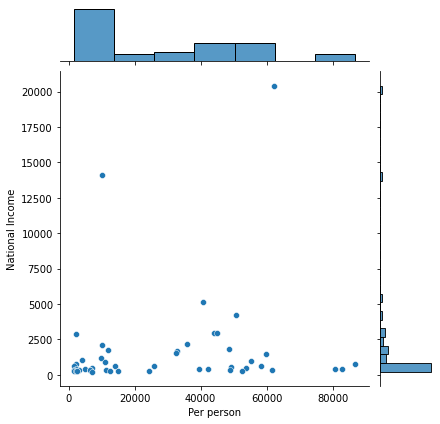

In [15]:
sns.jointplot(y='National Income',x='Per person',data=data,kind='scatter')
#this draw as shown no useless 

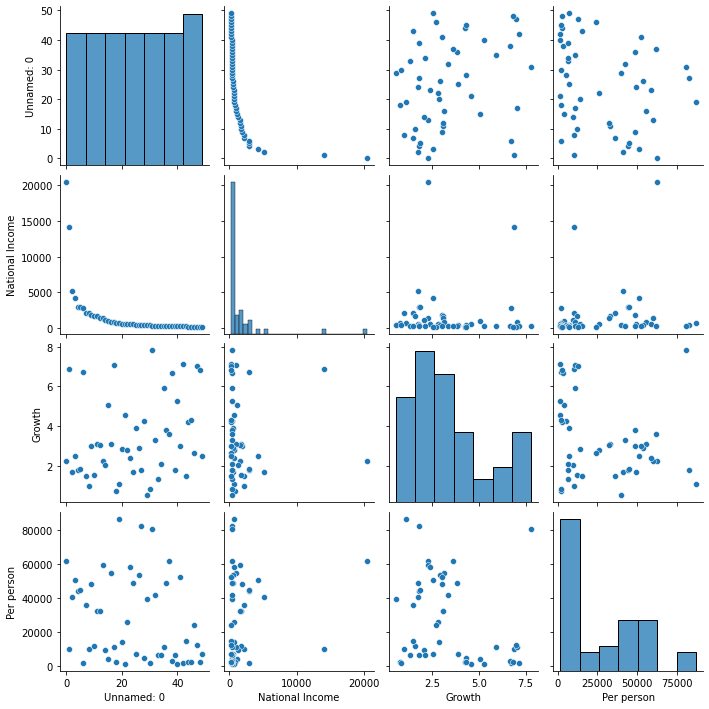

In [16]:
sns.pairplot(data)
# we can find here relation between Growth and Per Person 

In [17]:
df = px.data.gapminder()
fig = px.choropleth(data, locations="Countries", locationmode="country names",color='National Income',hover_data=['Countries','Continent','Growth','Per person']
                     
                    )
fig.show()